# <span style="color:darkblue"> Lecture 3b - Aggregating Data </span>

<font size = "5">

In the previous lecture we covered

- Missing values
- The basics of data cleaning

This class we will talk about 
- Computing aggregate statistics by group
- Introduction to merging

# <span style="color:darkblue"> I. Import Libraries and Data </span>


<font size = "5">
Key libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<font size = "5">

Read dataset on car racing circuits

- https://en.wikipedia.org/wiki/Formula_One <br>
- [See Data Source](https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020)

In [2]:
results = pd.read_csv("data_raw/results.csv")

In [3]:
# The codebook contains basic about the columns
# "Field" is the name given to the name of the column
# "Type"  is the variable type:
#         integer (int)
#         string (varchar - "variable character")
#         float (float)
#         The number in parenthesis is the maximum number of characters/digits
#         For most purposes we can ignore the numbers in parentheses.
# "Key" denotes whether this is the primary key "PRI" (also known as the identifier)
#         This is a column with unique values, that uniquely identifies each row
# "Description" contains a label with the content of the variable

<font size = "5">

Get column names + types

- Do types match the codebook?
- If not the data may need to be cleaned

In [3]:
# This code displays column types
# "int" or "float" objects are numneric
# "object" typically denotes strings
# If a column that's supposed to be "numeric" but appears as "object"
# then it needs to be cleaned and converted to numeric 

results.dtypes


resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number              object
grid                 int64
position            object
positionText        object
positionOrder        int64
points             float64
laps                 int64
time                object
milliseconds        object
fastestLap          object
rank                object
fastestLapTime      object
fastestLapSpeed     object
statusId             int64
dtype: object

<font size = "5">

Try it yourself!

- How many rows does the dataset have?
- How many unique values are there for the columns <br>
$\qquad$ "resultId"? <br>
$\qquad$ "raceId"? <br>
$\qquad$ "driverId"? <br>

HINT: Use the "len()" and the "pd.unique()" functions

In [16]:
# Write your own code here
len(results)
len(pd.unique(results["resultId"]))
len(pd.unique(results["raceId"]))
results["driverId"].nunique()





855

# <span style="color:darkblue"> II. Aggregate + groupby  </span>



<font size = "5">

Chaining refers to the process of carrying out succesive <br>
operations on a dataset with a single command

<font size = "5">

Splitting code into multiple lines

- Makes it easier to read
- Simply wrap the code in round parentheses "()"

In [18]:
# The following code computes descriptive statistics for points 
# Wrapping the code in parentheses "()" allows you to split it into multiple 
# lines. It's considered good practice to make each line less than 80 characters
# This makes it easier to scroll up and down without going sideways.

descriptives_singleline = (results["points"]
                           .describe())
descriptives_singleline

count    25840.000000
mean         1.877053
std          4.169849
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         50.000000
Name: points, dtype: float64

<font size = "5">

Aggregate statistics 

In [19]:
results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25841,1096,854,210,47,12,16,16,16,0.0,57,\N,\N,39,12,1:29.833,211.632,11
25836,25842,1096,825,210,20,16,17,17,17,0.0,57,\N,\N,40,20,1:31.158,208.556,11
25837,25843,1096,1,131,44,5,18,18,18,0.0,55,\N,\N,42,11,1:29.788,211.738,9
25838,25844,1096,849,3,6,20,19,19,19,0.0,55,\N,\N,45,14,1:30.309,210.517,130


In [9]:
# The ".agg()" subfunction computes aggregate statistics
# The syntax is ("column_name","function_name")
# The first argument is the column name
# The second argument is the function_name
# The command works with single quotations '...' or double "..."

results_agg = results.agg(mean_points = ('points','mean'),
                          sd_points =   ('points','std'),
                          min_points =  ('points','min'),
                          max_points =  ('points','max'),
                          count_obs   = ('points',len))

display(results_agg)

,points
mean_points,1.877053
sd_points,4.169849
min_points,0.000000
max_points,50.000000
count_obs,25840.000000


<font size = "5" >

Groupby + Aggregate statistics

<img src="figures/agg.png" alt="drawing" width="400"/>

In [36]:
# In this cases drivers engage in multiple car races
# We can compute the aggregate statistics for each specific driver across
# multiple car races

drivers_agg = (results.groupby("driverId")
                      .agg(mean_points = ('points','mean'),
                           sd_points =   ('points','std'),
                           min_points =  ('points','min'),
                           max_points =  ('points','max'),
                           count_obs   = ('points',len)))

drivers_agg

,mean_points,sd_points,min_points,max_points,count_obs
driverId,,,,,
1,14.182258,9.224098,0.0,50.0,310
2,1.407609,2.372923,0.0,15.0,184
3,7.740291,8.672456,0.0,25.0,206
4,5.756983,6.330721,0.0,25.0,358
5,0.937500,1.969503,0.0,10.0,112
...,...,...,...,...,...
852,1.000000,2.477808,0.0,12.0,44
853,0.000000,0.000000,0.0,0.0,22
854,0.272727,1.335798,0.0,8.0,44


In [11]:
results.loc[results['driverId']==1, ['points']].mean()

points    14.182258
dtype: float64

<font size = "5" >
Groupby + Aggregate statistics (multigroup)

In [12]:
# We can aggregate statistics from multiple columns by
# entering a list of column names in "groupby"
# In this case "constructor" in this case denotes the team 
# The following computes aggregate point stats for each (team, race) combination

teamrace_agg = (results.groupby(["raceId","constructorId"])
                       .agg(mean_points = ('points','mean'),
                            sd_points =   ('points','std'),
                            min_points =  ('points','min'),
                            max_points =  ('points','max'),
                            count_obs   = ('points',len)))

teamrace_agg

mean_points  sd_points  min_points  max_points  \
raceId constructorId                                                   
1      1                      0.0   0.000000         0.0         0.0   
       2                      0.0   0.000000         0.0         0.0   
       3                      1.5   2.121320         0.0         3.0   
       4                      2.0   2.828427         0.0         4.0   
       5                      1.5   0.707107         1.0         2.0   
...                           ...        ...         ...         ...   
1096   117                    2.5   2.121320         1.0         4.0   
       131                    5.0   7.071068         0.0        10.0   
       210                    0.0   0.000000         0.0         0.0   
       213                    0.0   0.000000         0.0         0.0   
       214                    3.0   4.242641         0.0         6.0   

                      count_obs  
raceId constructorId             
1      1                      2  
       2                      2  
       3                      2  
       4                      2  
       5                      2  
...                         ...  
1096   117                    2  
       131                    2  
       210                    2  
       213                    2  
       214                    2  

[12568 rows x 5 columns]

<font size = "5">

Filtering + Grouping + Aggregating: <br>

```python 
.query().groupby().agg()
```

- This sequential syntax is known as "chaining"


In [42]:
# The following gets a subset of the data using .query()
# In this case we subset the data before computing aggregate statistics
# Note: "filtering" is often the word used to obtain a subset

teamrace_agg = (results.query("raceId >= 500")
                       .groupby(["raceId","constructorId"])
                        .agg(mean_points = ('points','mean'),
                             sd_points =   ('points','std'),
                             min_points =  ('points','min'),
                             max_points =  ('points','max'),
                             count_obs   = ('points',len)))
teamrace_agg

mean_points  sd_points  min_points  max_points  \
raceId constructorId                                                   
500    1                      0.0   0.000000         0.0         0.0   
       3                      1.0   1.414214         0.0         2.0   
       4                      4.5   6.363961         0.0         9.0   
       6                      0.0   0.000000         0.0         0.0   
       21                     0.5   0.707107         0.0         1.0   
...                           ...        ...         ...         ...   
1096   117                    2.5   2.121320         1.0         4.0   
       131                    5.0   7.071068         0.0        10.0   
       210                    0.0   0.000000         0.0         0.0   
       213                    0.0   0.000000         0.0         0.0   
       214                    3.0   4.242641         0.0         6.0   

                      count_obs  
raceId constructorId             
500    1                      2  
       3                      2  
       4                      2  
       6                      2  
       21                     2  
...                         ...  
1096   117                    2  
       131                    2  
       210                    2  
       213                    2  
       214                    2  

[6055 rows x 5 columns]

In [14]:
results.query("raceId >= 500").groupby(["raceId","constructorId"]).agg(mean_points = ('points','mean'))

mean_points
raceId constructorId             
500    1                      0.0
       3                      1.0
       4                      4.5
       6                      0.0
       21                     0.5
...                           ...
1096   117                    2.5
       131                    5.0
       210                    0.0
       213                    0.0
       214                    3.0

[6055 rows x 1 columns]

<font size = "5">

Try it yourself!

- Create a new dataset by chaining  <br>
groups by "raceId" then computes the <br>
aggregate statistics: "points" average <br> and "laps" average


In [23]:
# Write your own code
points_agg = (results.groupby("raceId")
              .agg(mean_points = ('points', 'mean')))
laps_agg = (results.groupby("raceId")
            .agg(mean_laps = ('laps','mean')))

laps_agg



,mean_laps
raceId,
1,50.25
2,27.70
3,51.15
4,56.25
5,47.10
...,...
1092,25.20
1093,49.50
1094,68.90


<font size = "5">

Try it yourself!

- Create a new dataset by chaining <br>
groups by "constructorId" (the team) then <br> 
computes the average number of "points"
- Add a chain ".sort_values(...,ascending = False)" <br>
to sort by team points in desceding order


In [28]:
# Write your own code
points_ave = (results.groupby("constructorId")
              .agg(mean_points = ("points", "mean"))
              .sort_values("mean_points", ascending = False))
points_ave




,mean_points
constructorId,
131,12.363643
9,9.117816
23,5.058824
208,4.584416
6,4.317968
...,...
76,0.000000
77,0.000000
78,0.000000


# <span style="color:darkblue"> III. Relative statistics within group </span>



<font size = "5">

Merging

<img src="figures/merge_stats.png" alt="drawing" width="600"/>


In [37]:
drivers_agg

,mean_points,sd_points,min_points,max_points,count_obs
driverId,,,,,
1,14.182258,9.224098,0.0,50.0,310
2,1.407609,2.372923,0.0,15.0,184
3,7.740291,8.672456,0.0,25.0,206
4,5.756983,6.330721,0.0,25.0,358
5,0.937500,1.969503,0.0,10.0,112
...,...,...,...,...,...
852,1.000000,2.477808,0.0,12.0,44
853,0.000000,0.000000,0.0,0.0,22
854,0.272727,1.335798,0.0,8.0,44


In [30]:
results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25841,1096,854,210,47,12,16,16,16,0.0,57,\N,\N,39,12,1:29.833,211.632,11
25836,25842,1096,825,210,20,16,17,17,17,0.0,57,\N,\N,40,20,1:31.158,208.556,11
25837,25843,1096,1,131,44,5,18,18,18,0.0,55,\N,\N,42,11,1:29.788,211.738,9
25838,25844,1096,849,3,6,20,19,19,19,0.0,55,\N,\N,45,14,1:30.309,210.517,130


In [35]:
# This command merges the "aggregate" information in "driver_agg" into
# "results" as shown in the figure
# The merging variable "on" is determined by "driverId", which is a column
# that is common to both datasets
# "how = left" indicates that the left dataset is the baseline
#
# Note: For this method to work well "driverId" needs to contain unique alues
# in "drivers_agg". If not you may need to clean the data beforehand

results_merge = pd.merge(results,
                         drivers_agg,
                         on = "driverId",
                         how = "left")



In [28]:
results_merge

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,mean_points,sd_points,min_points,max_points,count_obs
0,1,18,1,1,22,1,1,1,1,10.0,...,39,2,1:27.452,218.300,1,14.182258,9.224098,0.0,50.0,310
1,27,19,1,1,22,9,5,5,5,4.0,...,53,3,1:35.462,209.033,1,14.182258,9.224098,0.0,50.0,310
2,57,20,1,1,22,3,13,13,13,0.0,...,25,19,1:35.520,203.969,11,14.182258,9.224098,0.0,50.0,310
3,69,21,1,1,22,5,3,3,3,6.0,...,20,3,1:22.017,204.323,1,14.182258,9.224098,0.0,50.0,310
4,90,22,1,1,22,3,2,2,2,8.0,...,31,2,1:26.529,222.085,1,14.182258,9.224098,0.0,50.0,310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25777,1093,855,51,24,18,12,12,12,0.0,...,46,15,1:42.471,193.682,1,0.272727,0.882735,0.0,4.0,22
25836,25798,1094,855,51,24,12,13,13,13,0.0,...,47,7,1:22.260,188.358,11,0.272727,0.882735,0.0,4.0,22
25837,25817,1095,855,51,24,13,12,12,12,0.0,...,64,17,1:15.802,204.643,1,0.272727,0.882735,0.0,4.0,22
25838,25837,1096,855,51,24,15,12,12,12,0.0,...,53,8,1:29.600,212.183,11,0.272727,0.882735,0.0,4.0,22


<font size = "5">

Try it yourself!

- Compute a scatter plot with ...
- "points" (y-axis) vs "mean_points" (x-axis)

Note: This plots tells you how much a driver's <br>
performance on individual races deviates from <br>
their overall average

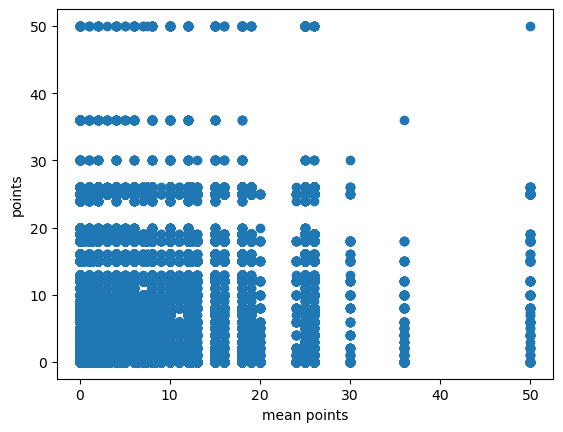

In [40]:
# Write your own code
plt.scatter(x = results_merge["mean_points"], y = results_merge["points"])
plt.xlabel("mean points")
plt.ylabel("points")
plt.show()



<font size = "5">

Try it yourself!

- Merge the "teamrace_agg" data into "results"
- This time use the option:

$\qquad$ ```on = ["raceId","constructorId"]```

In [47]:
# Write your own code
teamrace_agg
results_merge2 = pd.merge(results,
                          teamrace_agg,
                          on = ["raceId", "constructorId"],
                          how = "left")
results_merge2



,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,mean_points,sd_points,min_points,max_points,count_obs
0,1,18,1,1,22,1,1,1,1,10.0,...,39,2,1:27.452,218.300,1,NaN,NaN,NaN,NaN,NaN
1,2,18,2,2,3,5,2,2,2,8.0,...,41,3,1:27.739,217.586,1,NaN,NaN,NaN,NaN,NaN
2,3,18,3,3,7,7,3,3,3,6.0,...,41,5,1:28.090,216.719,1,NaN,NaN,NaN,NaN,NaN
3,4,18,4,4,5,11,4,4,4,5.0,...,58,7,1:28.603,215.464,1,NaN,NaN,NaN,NaN,NaN
4,5,18,5,1,23,3,5,5,5,4.0,...,43,1,1:27.418,218.385,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25841,1096,854,210,47,12,16,16,16,0.0,...,39,12,1:29.833,211.632,11,0.0,0.000000,0.0,0.0,2.0
25836,25842,1096,825,210,20,16,17,17,17,0.0,...,40,20,1:31.158,208.556,11,0.0,0.000000,0.0,0.0,2.0
25837,25843,1096,1,131,44,5,18,18,18,0.0,...,42,11,1:29.788,211.738,9,5.0,7.071068,0.0,10.0,2.0
25838,25844,1096,849,3,6,20,19,19,19,0.0,...,45,14,1:30.309,210.517,130,0.0,0.000000,0.0,0.0,2.0
